# Tony Quertier - Project 1 : Navigation

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the first project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893).

### 1. Start the Environment

Run the next code cell to install a few packages. 

In [1]:
!pip -q install ./python

We begin by importing some necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment
import numpy as np
import torch
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline

from Dqn_agent import Agent



Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Banana.app"`
- **Windows** (x86): `"path/to/Banana_Windows_x86/Banana.exe"`
- **Windows** (x86_64): `"path/to/Banana_Windows_x86_64/Banana.exe"`
- **Linux** (x86): `"path/to/Banana_Linux/Banana.x86"`
- **Linux** (x86_64): `"path/to/Banana_Linux/Banana.x86_64"`
- **Linux** (x86, headless): `"path/to/Banana_Linux_NoVis/Banana.x86"`
- **Linux** (x86_64, headless): `"path/to/Banana_Linux_NoVis/Banana.x86_64"`

For instance, if you are using a Mac, then you downloaded `Banana.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Banana.app")
```

In [2]:
# please do not modify the line below
env = UnityEnvironment(file_name="Banana_Windows_x86_64/Banana.exe")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

The simulation contains a single agent that navigates a large environment.  At each time step, it has four actions at its disposal:
- `0` - walk forward 
- `1` - walk backward
- `2` - turn left
- `3` - turn right

The state space has `37` dimensions and contains the agent's velocity, along with ray-based perception of objects around agent's forward direction.  A reward of `+1` is provided for collecting a yellow banana, and a reward of `-1` is provided for collecting a blue banana. 

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents in the environment
print('Number of agents:', len(env_info.agents))

# number of actions
action_size = brain.vector_action_space_size
print('Number of actions:', action_size)

# examine the state space 
state = env_info.vector_observations[0]
print('States look like:', state)
state_size = len(state)
print('States have length:', state_size)

Number of agents: 1
Number of actions: 4
States look like: [1.         0.         0.         0.         0.84408134 0.
 0.         1.         0.         0.0748472  0.         1.
 0.         0.         0.25755    1.         0.         0.
 0.         0.74177343 0.         1.         0.         0.
 0.25854847 0.         0.         1.         0.         0.09355672
 0.         1.         0.         0.         0.31969345 0.
 0.        ]
States have length: 37


### 3. Train the agent

.
Episode 1	Average Score: -1.00.
Episode 2	Average Score: -1.00.
Episode 3	Average Score: -0.33.
Episode 4	Average Score: -0.25.
Episode 5	Average Score: -0.40.
Episode 6	Average Score: -0.50.
Episode 7	Average Score: -0.29.
Episode 8	Average Score: -0.12.
Episode 9	Average Score: 0.00.
Episode 10	Average Score: 0.10.
Episode 11	Average Score: 0.09.
Episode 12	Average Score: -0.08.
Episode 13	Average Score: -0.08.
Episode 14	Average Score: -0.14.
Episode 15	Average Score: -0.13.
Episode 16	Average Score: 0.06.
Episode 17	Average Score: 0.00.
Episode 18	Average Score: 0.06.
Episode 19	Average Score: 0.05.
Episode 20	Average Score: 0.10.
Episode 21	Average Score: 0.24.
Episode 22	Average Score: 0.23.
Episode 23	Average Score: 0.22.
Episode 24	Average Score: 0.12.
Episode 25	Average Score: 0.12.
Episode 26	Average Score: 0.19.
Episode 27	Average Score: 0.26.
Episode 28	Average Score: 0.25.
Episode 29	Average Score: 0.17.
Episode 30	Average Score: 0.17.
Episode 31	Average Score: 0.16.
Epi

Episode 253	Average Score: 8.93.
Episode 254	Average Score: 8.95.
Episode 255	Average Score: 9.09.
Episode 256	Average Score: 9.09.
Episode 257	Average Score: 9.08.
Episode 258	Average Score: 9.00.
Episode 259	Average Score: 9.11.
Episode 260	Average Score: 9.24.
Episode 261	Average Score: 9.32.
Episode 262	Average Score: 9.35.
Episode 263	Average Score: 9.38.
Episode 264	Average Score: 9.46.
Episode 265	Average Score: 9.44.
Episode 266	Average Score: 9.54.
Episode 267	Average Score: 9.63.
Episode 268	Average Score: 9.70.
Episode 269	Average Score: 9.66.
Episode 270	Average Score: 9.76.
Episode 271	Average Score: 9.79.
Episode 272	Average Score: 9.83.
Episode 273	Average Score: 9.91.
Episode 274	Average Score: 9.89.
Episode 275	Average Score: 9.88.
Episode 276	Average Score: 9.93.
Episode 277	Average Score: 9.99.
Episode 278	Average Score: 10.01.
Episode 279	Average Score: 10.00.
Episode 280	Average Score: 10.07.
Episode 281	Average Score: 10.13.
Episode 282	Average Score: 10.11.
Episo

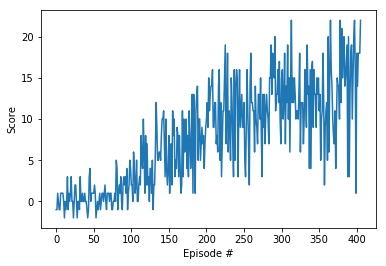

In [6]:
agent = Agent(state_size, action_size, seed=0)

def train(n_episodes=2000, max_t=1000, eps_start=1.0, eps_end=0.01, eps_decay=0.99):
    """Deep Q-Learning.
    
    Params
    ======
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
        eps_start (float): starting value of epsilon, for epsilon-greedy action selection
        eps_end (float): minimum value of epsilon
        eps_decay (float): multiplicative factor (per episode) for decreasing epsilon
    """
    scores = []                        # list containing scores from each episode
    scores_window = deque(maxlen=100)  # last 100 scores
    eps = eps_start                    # initialize epsilon
    for i_episode in range(1, n_episodes+1):
        print(".")
        #state = env.reset()
        env_info = env.reset(train_mode=True)[brain_name]
        state = env_info.vector_observations[0]
        score = 0
        for t in range(max_t):
            action = agent.act(state, eps).astype(np.int32)
            env_temp = env.step(action)[brain_name]
            next_state = env_temp.vector_observations[0]
            reward = env_temp.rewards[0]
            done = env_temp.local_done[0]
            agent.step(state, action, reward, next_state, done)
            state = next_state
            score += reward
            if done:
                break 
        scores_window.append(score)       # save most recent score
        scores.append(score)              # save most recent score
        eps = max(eps_end, eps_decay*eps) # decrease epsilon
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)), end="")
        if i_episode % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
        if np.mean(scores_window)>=13.0:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode-100, np.mean(scores_window)))
            torch.save(agent.qnetwork_local.state_dict(), 'Dueling_model.pth')
            break
    return scores

scores = train()

# plot the scores


fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()



### 4. Test the agent

In [8]:
brain_name = env.brain_names[0] # get the name of the brains from the Unity environment
brain = env.brains[brain_name]
env_info = env.reset(train_mode=False)[brain_name] # reset the environment and obtain info on state/action space

# initialize agent with state size and action size.
agent = Agent(len(env_info.vector_observations[0]), brain.vector_action_space_size, seed=0)

# load the trained weights
agent.qnetwork_local.load_state_dict(torch.load('Dueling_model.pth'))

state = env_info.vector_observations[0]  # get the first state
score = 0 # initialize the score
while True: # loop until the episode ends
    action = agent.act(state, 0).astype(np.int32) # select a greedy action
    env_info = env.step(action)[brain_name] # take that action
    score += env_info.rewards[0] # update the score with the reward for taking that action
    next_state = env_info.vector_observations[0] # the next state
    state = next_state # set current state to next state
    done = env_info.local_done[0] # get the value of the done bool, indicating the episode is over
    # end episode if done is true
    if done:
        break

print("Score: {}".format(score)) # print the score





Score: 17.0


When finished, you can close the environment.

In [ ]:
env.close()